# Store Sales - Time Series Forecasting Candelo-Zuluaga Version 1
## Use machine learning to predict grocery sales

## Description
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview
### Goal of the competition 
In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.

Specifically, you'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores. You'll practice your machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales.

### Context 
Forecasts aren’t just for meteorologists. Governments forecast economic growth. Scientists attempt to predict the future population. And businesses forecast product demand—a common task of professional data scientists. Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.

### Potential Impact
If successful, you'll have flexed some new skills in a real world example. For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction. The results of this ongoing competition, over time, might even ensure your local store has exactly what you need the next time you shop.

### Evaluation
The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as:
1n∑i=1n(log(1+y^i)−log(1+yi))2−−−−−−−−−−−−−−−−−−−−−−−−−−√
where:

n
 is the total number of instances,
y^i
 is the predicted value of the target for instance (i),
yi
 is the actual value of the target for instance (i), and,
log
 is the natural logarithm.

### Submission File
For each id in the test set, you must predict a value for the sales variable. The file should contain a header and have the following format:

`id,sales`

`3000888,0.0`

`3000889,0.0`

etc.

## Data
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

### Dataset Description
In this competition, you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

### File Descriptions and Data Field Information
### train.csv
* The training data, comprising time series of features `store_nbr`, `family`, and `onpromotion` as well as the target sales.
* `store_nbr` identifies the store at which the products are sold.
* `family` identifies the type of product sold.
* `sales` gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
* `onpromotion` gives the total number of items in a product family that were being promoted at a store at a given date.

### test.csv
* The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
* The dates in the test data are for the 15 days after the last date in the training data.

### sample_submission.csv
* A sample submission file in the correct format.

### stores.csv 
* Store metadata, including city, state, type and cluster. 
* cluster is a grouping of similar stores.

### oil.csv
* Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

### holidays_events.csv
* Holidays and Events, with metadata
* NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
* Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
## Additional Notes
* Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
* A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [2]:
# Import Basic Tools to start working
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import sklearn as sck 

## Importing train.csv
* `Objective:` To analyze the data. 
* Enrich the data if needed with the complementary files.

In [14]:
Train_Data = pd.read_csv('DATA/train.csv')
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


Looking at the data, it is important to transform the date into official number to allow the model to use it properly and to convert 'family' into numerical values, so it is possible to be trained by a model. 

In [17]:
Train_Data = pd.read_csv('DATA/train.csv',low_memory=False, parse_dates=["date"]) # We parse dates with pandas!!!!!!
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


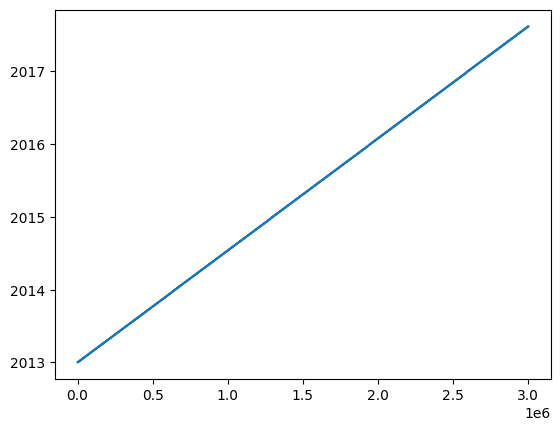

In [19]:
# We should check if the data is properly organized in time
plt.plot(Train_Data.id, Train_Data.date)